In [1]:
import os 
os.getcwd()


'C:\\Users\\rasareen\\ML Practise'

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install scipy


In [5]:
!pip install scikit-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import sklearn
import scipy

In [7]:
#import data set
data = pd.read_csv("CreditCard (2).csv")

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Step 1  Data Preprocessing
#Checking null nvalue
#no missing data found
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#Step 2 No char variable so no encoding is needed 

In [12]:
#Step 3 Outlier Treatment
#Since it's classification prb so no need to do outlier treatment 

In [13]:
# Step 4 Feature Scaling 
# Not required as max data range is bw -1 to +1

In [14]:
# Step 5 Check Imbalance Dataset
data['Class'].value_counts()
# Yes , we r having imbalance dataset but we will not handle it 

Class
0    284315
1       492
Name: count, dtype: int64

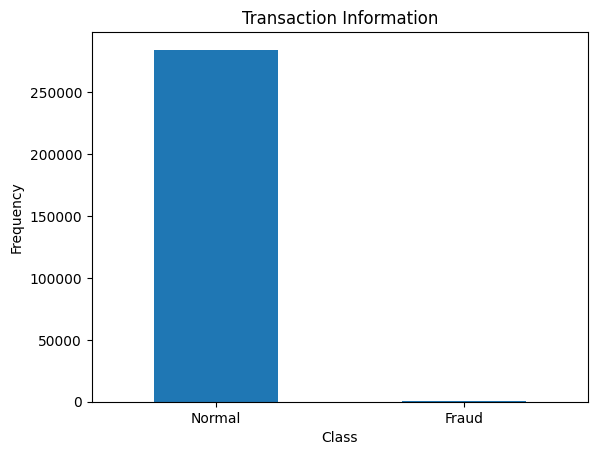

In [15]:
# Step 6 EDA
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar' , rot = 0)
plt.title("Transaction Information")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [16]:
fraud = data[data["Class"]==1]
normal = data [data["Class"]==0]
print(fraud.shape)  # means out of 31 variables 492 variables has fraud 
print(normal.shape)  # means out of 31 variables 284315 variables has fraud 

(492, 31)
(284315, 31)


In [17]:
# Now we will see what max amt happen in fraud and in normal 
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()
#now if we see max of normal > max of fraud , so this is a sense of relief 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

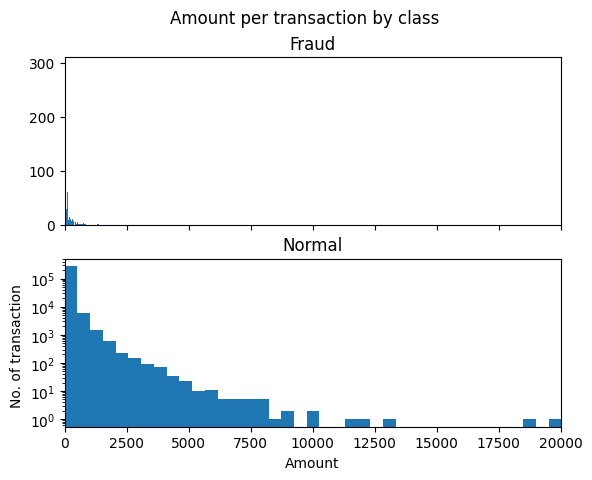

In [19]:
f, (ax1,ax2) = plt.subplots(2,1, sharex = True) #2 row 1 col . The sharex parameter allows these subplots to share the same x-axis, which is particularly useful when comparing 
#data across different plots. sharex = True means want to see visualisation.
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount, bins=bins)
ax2.set_title("Normal")
plt.xlabel("Amount")
plt.ylabel("No. of transaction ")
plt.xlim(0,20000)
plt.yscale('log')
plt.show()


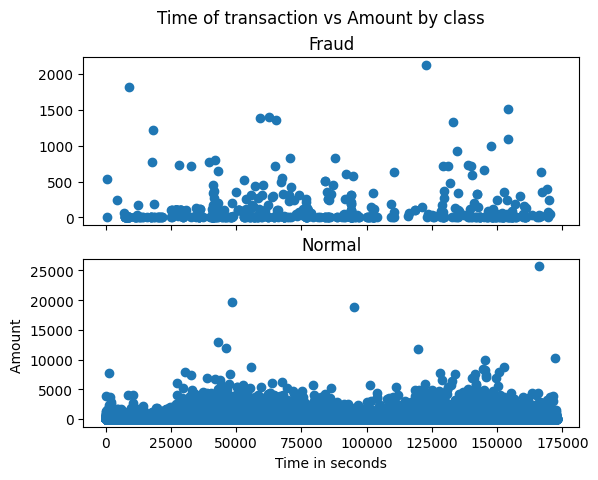

In [20]:
# Now we will do similar analysis as above for Time
f, (ax1,ax2) = plt.subplots(2,1, sharex = True) 
f.suptitle("Time of transaction vs Amount by class ")

ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title("Normal")
plt.xlabel("Time in seconds")
plt.ylabel("Amount ")

plt.show()
#GRAPH IS HAVING UNIFORM DISTRIBUTION

In [21]:
outlier_fraction = len(fraud)/float(len(normal))
outlier_fraction #it shows what % is fraudulent data 

0.0017304750013189597

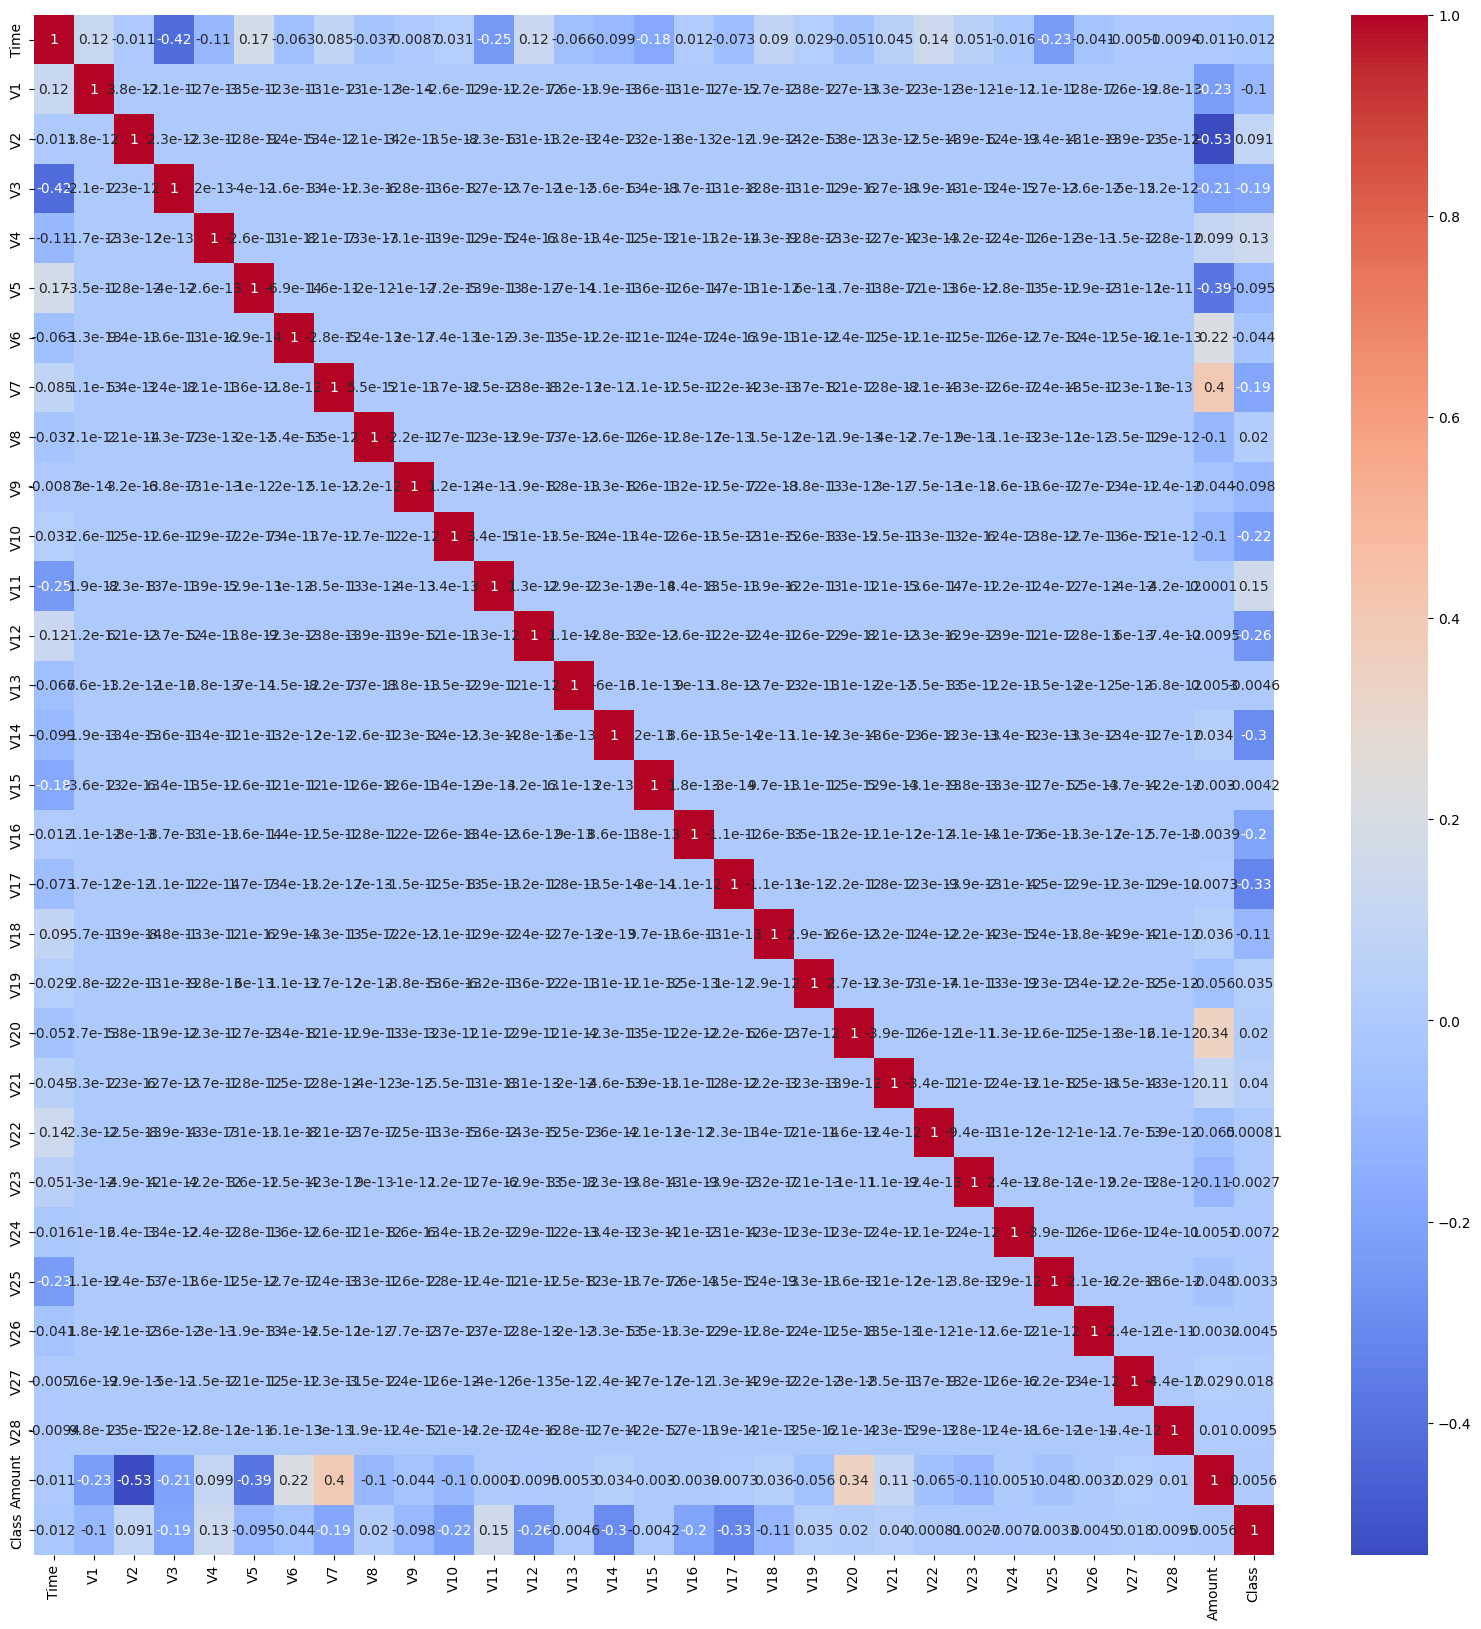

In [22]:
#Corelation , we r doing tthis to check whether there is +ve -ve relation with dependent variable or not
#here we will check whether 2 independent variable r equal or not (this cond is cd multicolinerity)
#how to decide which variable to remove is by heat map or use variance inflation factor(VIF) , but VIF used in Regression prb nd this is classification prb
#Heat Map

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap= 'coolwarm')
#As evident in heat map there is no multicolinearity as no 2 dependent variable has value as 1 .

In [23]:
col = data.columns

In [24]:
#Spliting data into target and independent (FEATURE ) variable 
col = [c for c in col if c not in ['Class']] #or x = data.drop(['Class'], axis = 1) or x = data.iloc[:,0:31]
target = 'Class'
state = np.random.RandomState(101)
x = data[col]
y = data[target]

In [25]:
# any customer above uniform dist is outlier , so for that outlier do full history check. 
#this x_outlier will be used in high algo , otherwise we can build the model with help of x and y also
x_outlier = state.uniform(low =0, high = 1, size = (x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [26]:
#split data into train nd test 
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.70, test_size = 0.30, random_state= 110)

In [28]:
x_train.shape

(199364, 30)

In [29]:
x_test.shape

(85443, 30)

In [30]:
#Logistic Regression (logistic is generalised linear model)
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)


LogisticRegression()

In [31]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [33]:
print (classification_report(y_train,y_pred_train))
print("######" * 40)
print (classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.67      0.64      0.66       352

    accuracy                           1.00    199364
   macro avg       0.84      0.82      0.83    199364
weighted avg       1.00      1.00      1.00    199364

################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.68      0.61      0.65       140

    accuracy                           1.00     85443
   macro avg       0.84      0.81      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [34]:
print (confusion_matrix(y_train,y_pred_train))
print("######" * 40)
print (confusion_matrix(y_test,y_pred_test))
#train error = 125 +111 nd test error = 54 + 40 i.e. FP+FN)

[[198901    111]
 [   125    227]]
################################################################################################################################################################################################################################################
[[85263    40]
 [   54    86]]


In [35]:
print (accuracy_score(y_train,y_pred_train))
print("######" * 40)
print (accuracy_score(y_test,y_pred_test))
#accuracy not good measure as this is imbalance data set 

0.9988162356293012
################################################################################################################################################################################################################################################
0.9988998513628969


In [36]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)



DecisionTreeClassifier()

In [37]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [38]:
print (accuracy_score(y_train,y_pred_dt_train))
print("######" * 40)
print (accuracy_score(y_test,y_pred_dt_test))

1.0
################################################################################################################################################################################################################################################
0.9993094811745842


In [39]:
print (confusion_matrix(y_train,y_pred_dt_train))
print("######" * 40)
print (confusion_matrix(y_test,y_pred_dt_test))

[[199012      0]
 [     0    352]]
################################################################################################################################################################################################################################################
[[85279    24]
 [   35   105]]


In [40]:
print (classification_report(y_train,y_pred_dt_train))
print("######" * 40)
print (classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.81      0.75      0.78       140

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (n_estimators= 5 , criterion= 'gini')
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [ ]:
print (accuracy_score(y_train,y_pred_rfc_train))
print("######" * 40)
print (accuracy_score(y_test,y_pred_rfc_test))

##XG Boost

In [102]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.7 MB 919.0 kB/s eta 0:01:49
   ---------------------------------------- 0.1/99.7 MB 819.2 kB/s eta 0:02:02
   ---------------------------------------- 0.2/99.7 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.3/99.7 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.5/99.7 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.6/99.7 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.8/99.7 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 1.0/99.7 MB 2.4 MB/s eta 0:00:42
   -----------------------

In [103]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [105]:
print (accuracy_score(y_train,y_pred_xgb_train))
print("######" * 40)
print (accuracy_score(y_test,y_pred_xgb_test))

1.0
################################################################################################################################################################################################################################################
0.999602073897218


In [106]:
print (classification_report(y_train,y_pred_xgb_train))
print("######" * 40)
print (classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.97      0.78      0.87       140

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

